In [2]:
from itertools import cycle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
class Perceptron:
    """
    Create a perceptron.
    train_data: A 4x2 matrix with the input data.
    target: A 4x1 matrix with the perceptron's expected outputs
    lr: the learning rate. Defaults to 0.01
    input_nodes: the number of nodes in the input layer of the perceptron.
        Should be equal to the second dimension of train_data.
    """

    def __init__(self, train_data, target, lr=0.01, input_nodes=2):
        self.train_data = train_data
        self.target = target
        self.lr = lr
        self.input_nodes = input_nodes

        # randomly initialize the weights and set the bias to -1.
        self.w = np.random.uniform(size=self.input_nodes)
        self.b = -1

        # node_val hold the values of each node at a given point of time.
        self.node_val = np.zeros(self.input_nodes)

    def _gradient(self, node, exp, output):
        """
        Return the gradient for a weight.
        This is the value of delta-w.
        """
        return node * (exp - output)

    def update_weights(self, exp, output):
        """
        Update weights and bias based on their respective gradients
        """
        for i in range(self.input_nodes):
            self.w[i] += self.lr * self._gradient(self.node_val[i], exp, output)

        # the value of the bias node can be considered as being 1 and the weight between this node
        # and the output node being self.b
        self.b += self.lr * self._gradient(1, exp, output)

    def forward(self, datapoint):
        """
        One forward pass through the perceptron.
        Implementation of "wX + b".
        """
        return self.b + np.dot(self.w, datapoint)

    def classify(self, datapoint):
        """
        Return the class to which a datapoint belongs based on
        the perceptron's output for that point.
        """
        if self.forward(datapoint) >= 0:
            return 1

        return 0
    def plot(self, h=0.01):
        """
        Generate plot of input data and decision boundary.
        """
        # setting plot properties like size, theme and axis limits
        sns.set_style('darkgrid')
        plt.figure(figsize=(20, 20))

        plt.axis('scaled')
        plt.xlim(-0.1, 1.1)
        plt.ylim(-0.1, 1.1)

        colors = {
            0: "ro",
            1: "go"
        }

        # plotting the four datapoints
        for i in range(len(self.train_data)):
            plt.plot([self.train_data[i][0]],
                     [self.train_data[i][1]],
                     colors[self.target[i][0]],
                     markersize=20)

        x_range = np.arange(-0.1, 1.1, h)
        y_range = np.arange(-0.1, 1.1, h)

        # creating a mesh to plot decision boundary
        xx, yy = np.meshgrid(x_range, y_range, indexing='ij')
        Z = np.array([[self.classify([x, y]) for x in x_range] for y in y_range])

        # using the contourf function to create the plot
        plt.contourf(xx, yy, Z, colors=['red', 'green', 'green', 'blue'], alpha=0.4)


    def train(self):
        """
        Train a single layer perceptron.
        """
        # the number of consecutive correct classifications
        correct_counter = 0

        for train, target in cycle(zip(self.train_data, self.target)):
            # end if all points are correctly classified
            if correct_counter == len(self.train_data):
                break

            output = self.classify(train)
            self.node_val = train

            if output == target:
                correct_counter += 1
            else:
                # if incorrectly classified, update weights and reset correct_counter
                self.update_weights(target, output)
                correct_counter = 0

In [4]:
train_data = np.array(
    [
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]])

target_xor = np.array(
    [
        [0],
        [1],
        [1],
        [0]])

target_nand = np.array(
    [
        [1],
        [1],
        [1],
        [0]])

target_or = np.array(
    [
        [0],
        [1],
        [1],
        [1]])

target_and = np.array(
    [
        [0],
        [0],
        [0],
        [1]])

In [5]:
# instantiate perceptrons for each gate
xor = Perceptron(train_data, target_xor)
nand = Perceptron(train_data, target_nand)
or_gate = Perceptron(train_data, target_or)
and_gate = Perceptron(train_data, target_and)

# train each perceptron
# xor.train()
# nand.train()
or_gate.train()
and_gate.train()


/var/folders/5t/n08vsybj1yb3nfcd4x7sdz640000gn/T/ipykernel_23944/1310836837.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.w[i] += self.lr * self._gradient(self.node_val[i], exp, output)


In [6]:
# print the weights and bias for each perceptron
print("XOR weights: ", xor.w)
print("XOR bias: ", xor.b)
print("NAND weights: ", nand.w)

XOR weights:  [0.38242285 0.48123879]
XOR bias:  -1
NAND weights:  [0.98452072 0.17114206]


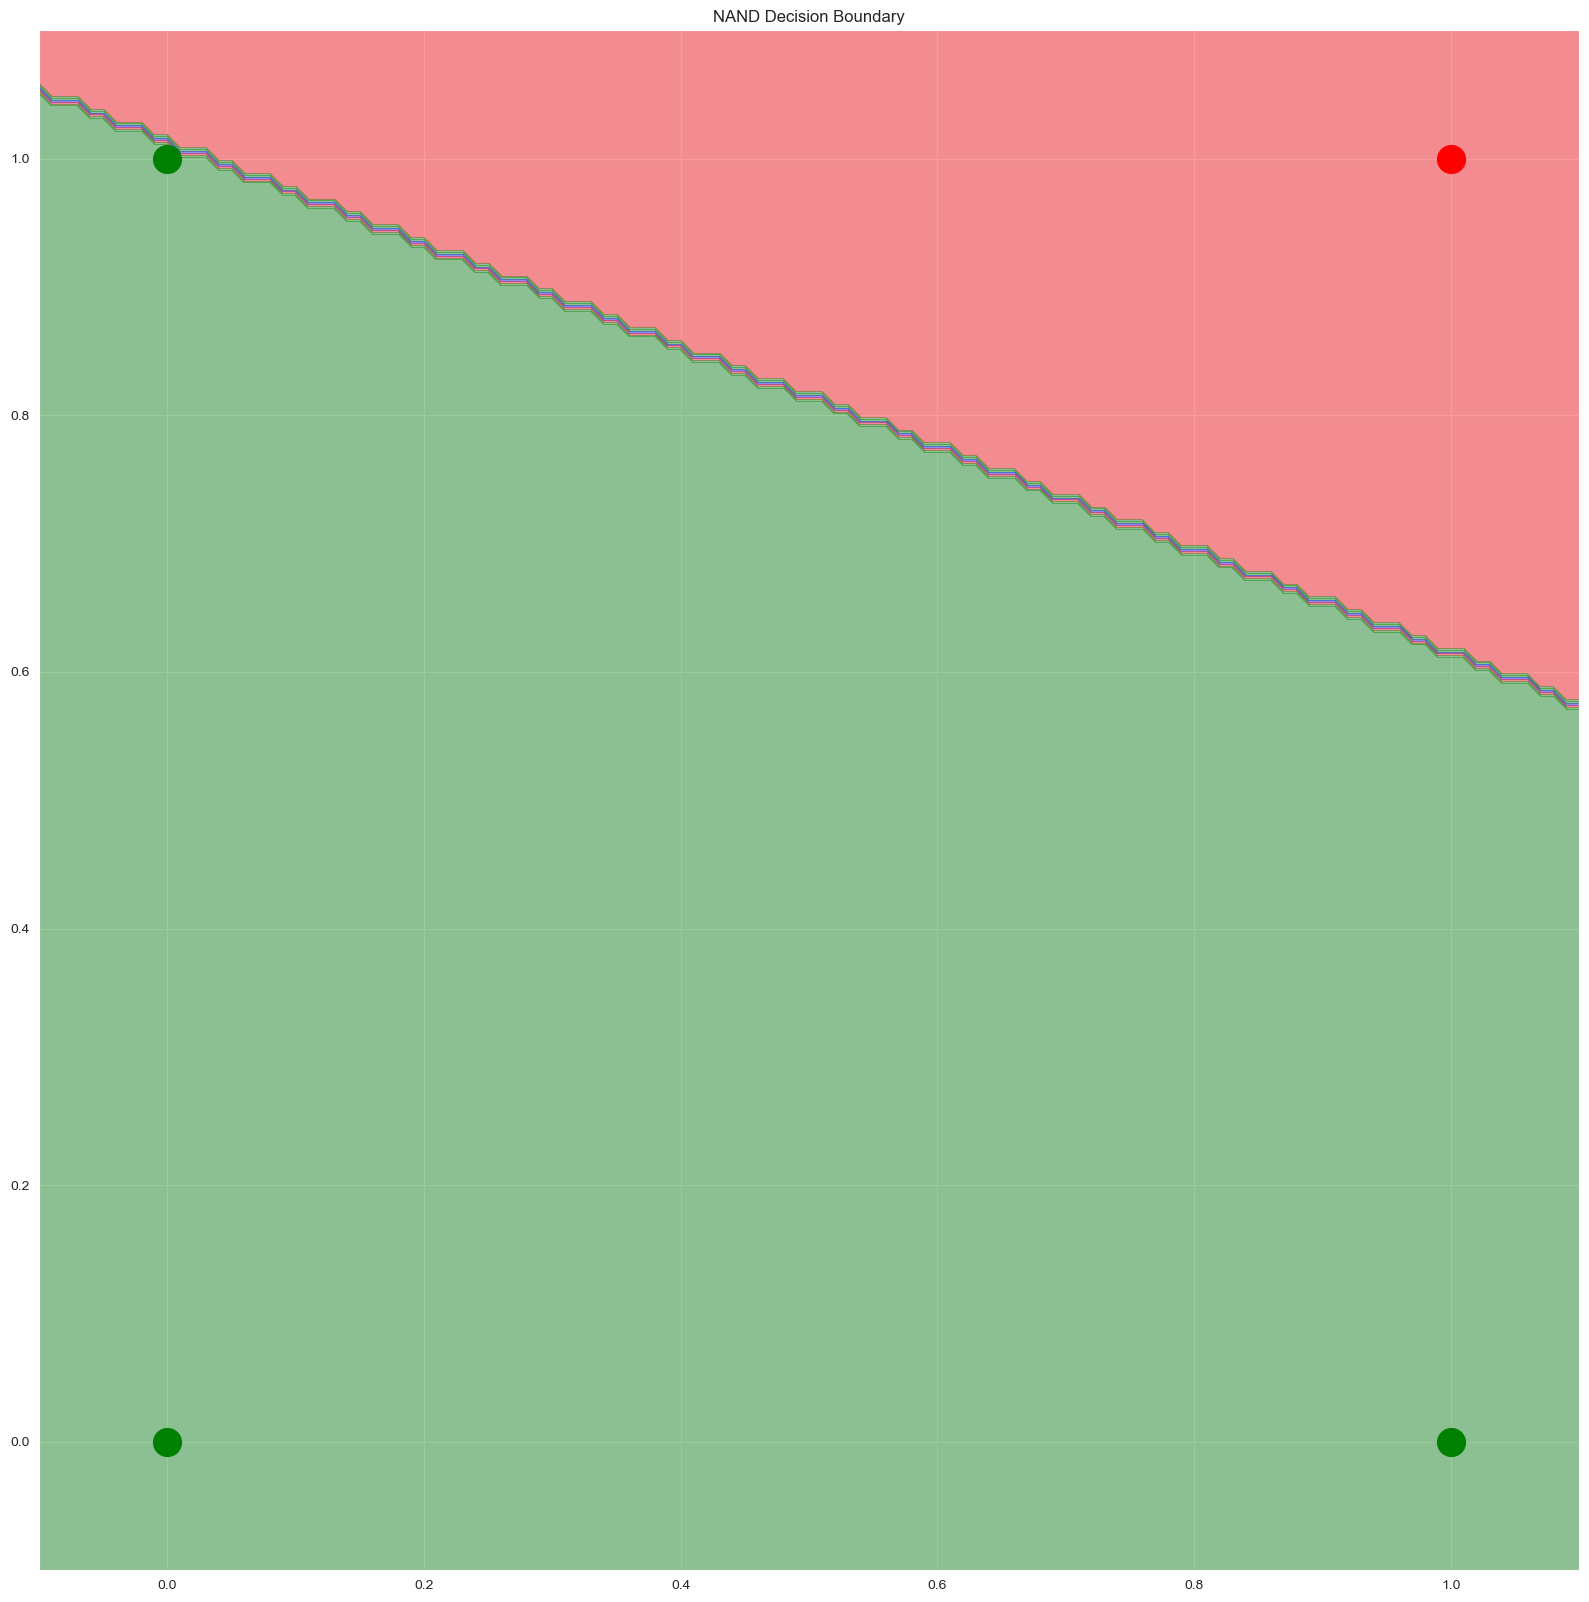

In [8]:


nand.plot()
plt.title("NAND Decision Boundary")
plt.show()

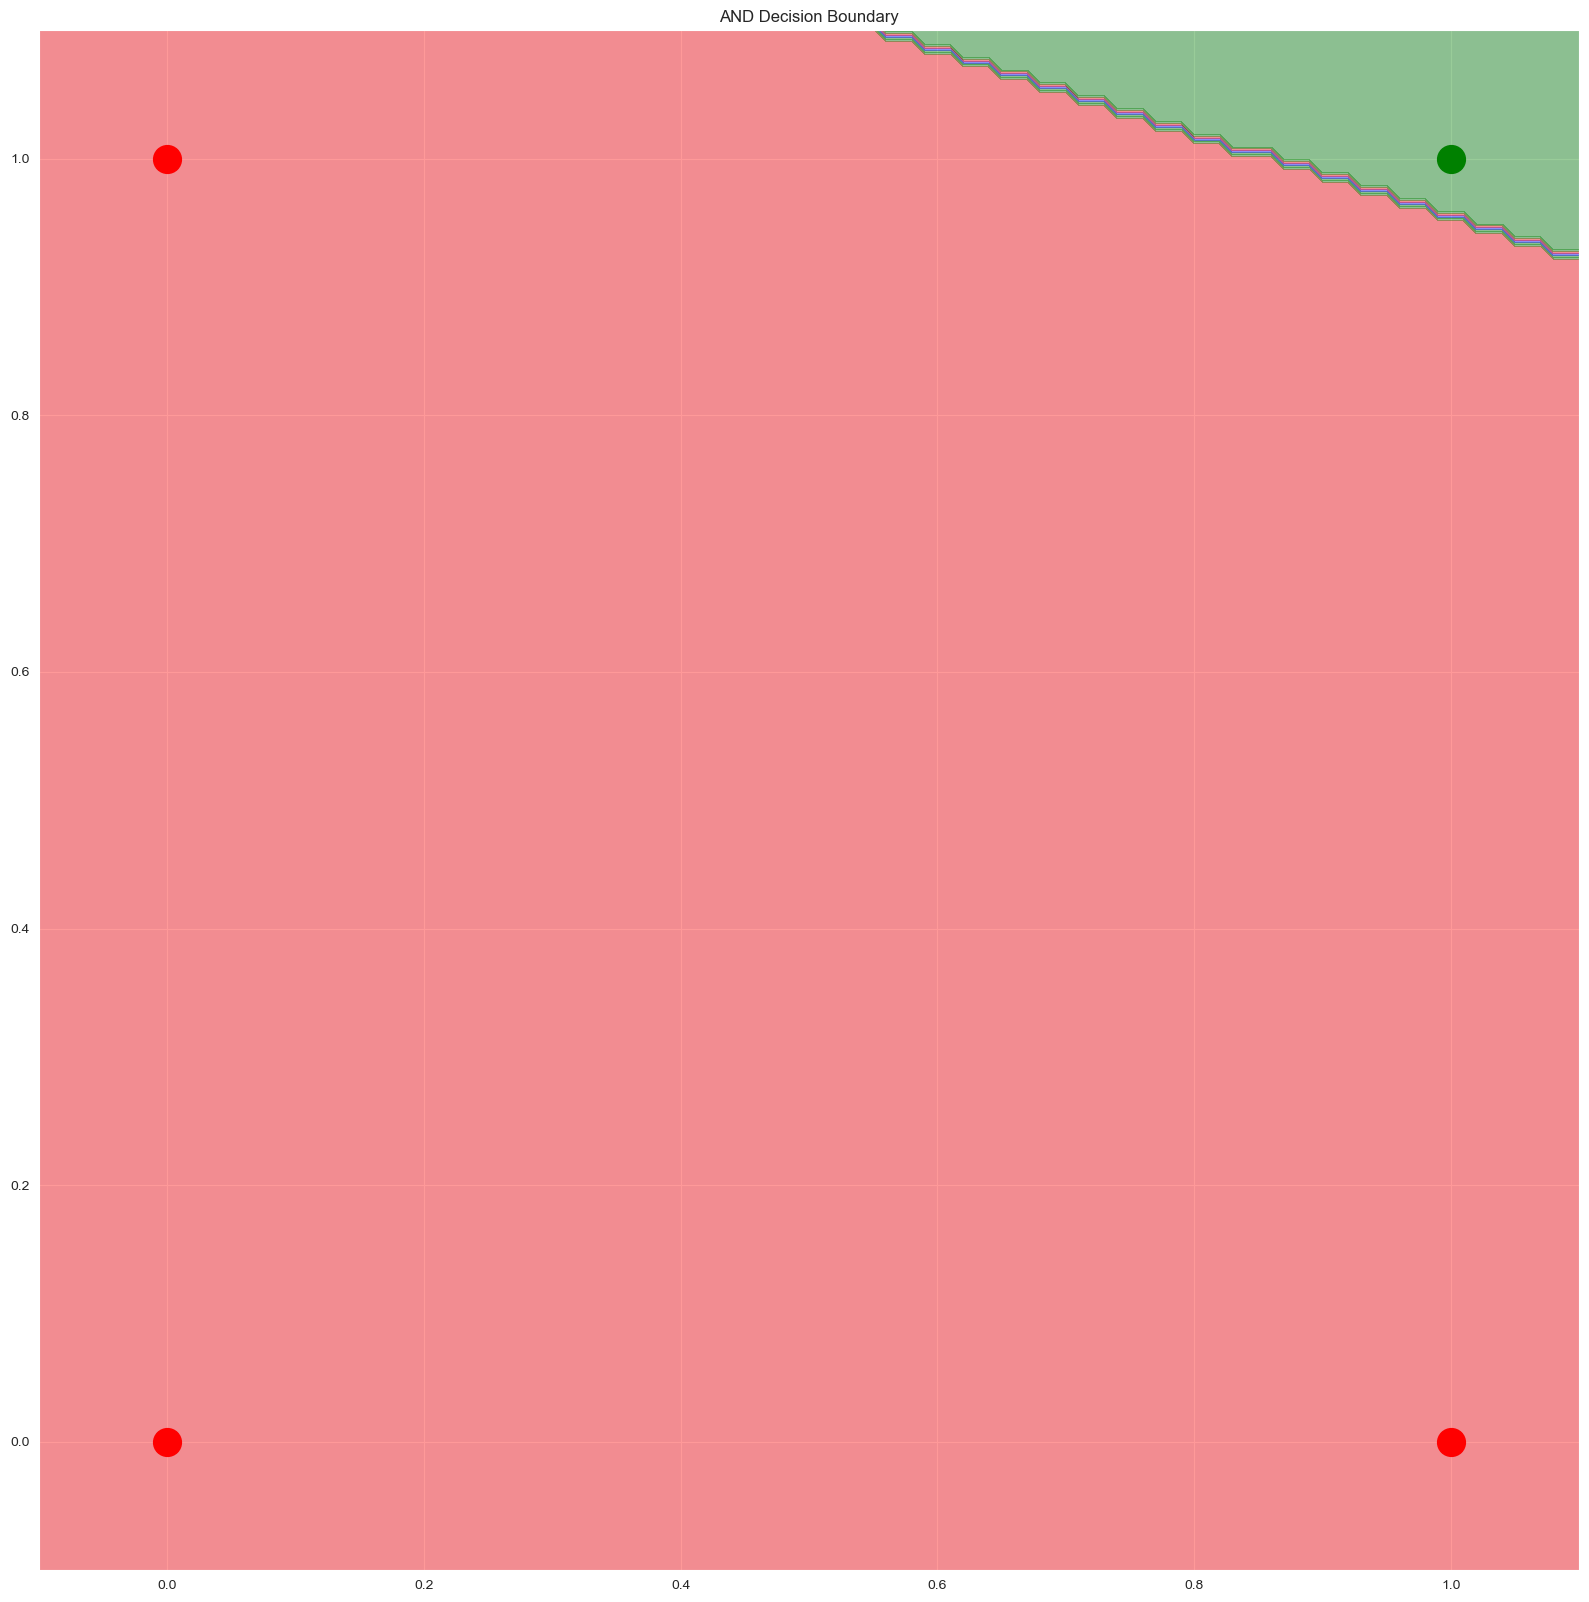

In [9]:


# plot and gate
and_gate.plot()
plt.title("AND Decision Boundary")
plt.show()

Text(0.5, 1.0, 'OR Decision Boundary')

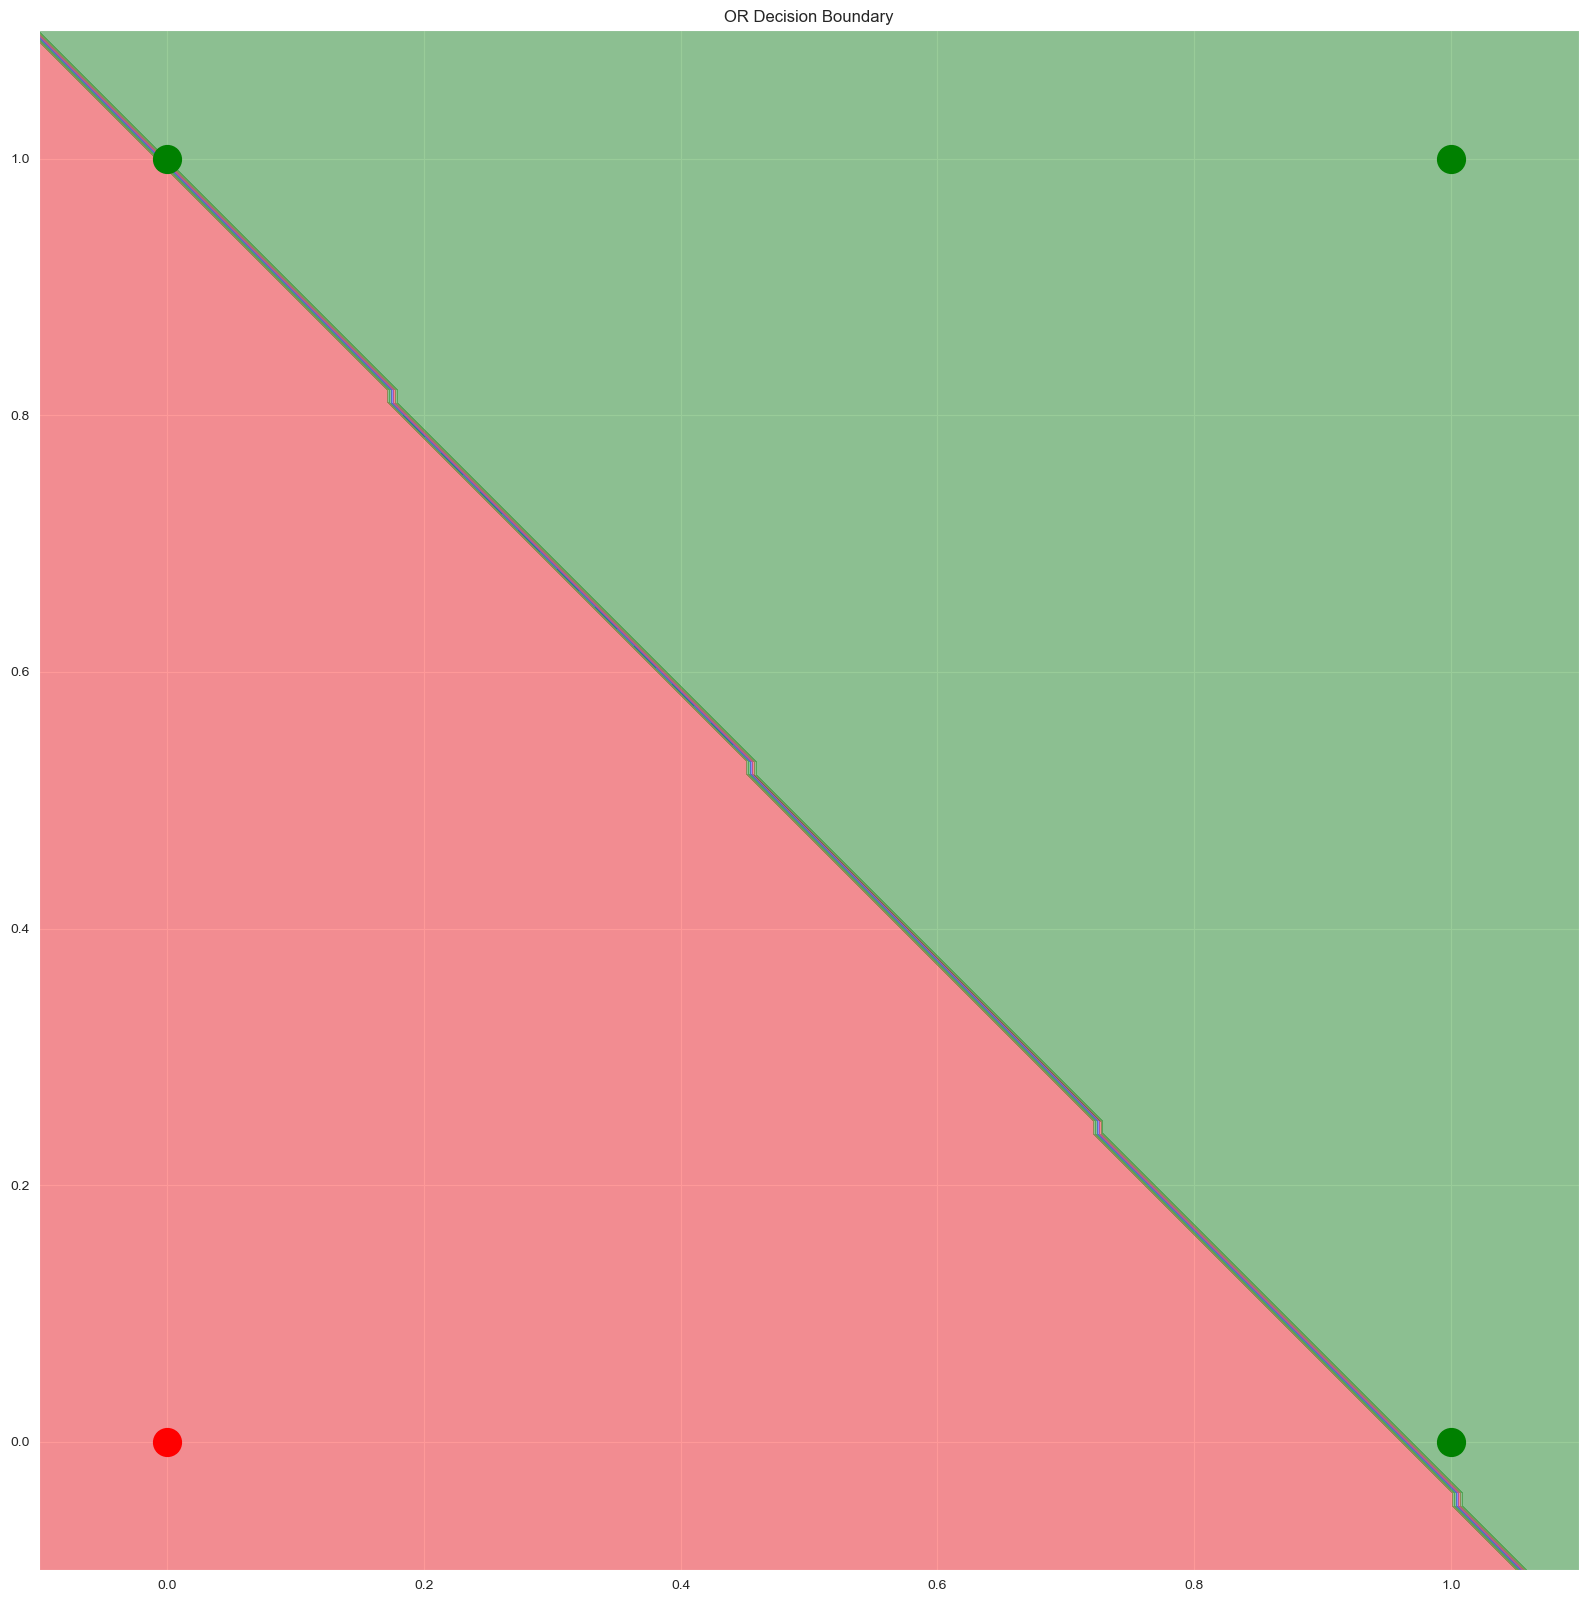

In [7]:
# plot counter
or_gate.plot()
plt.title("OR Decision Boundary")

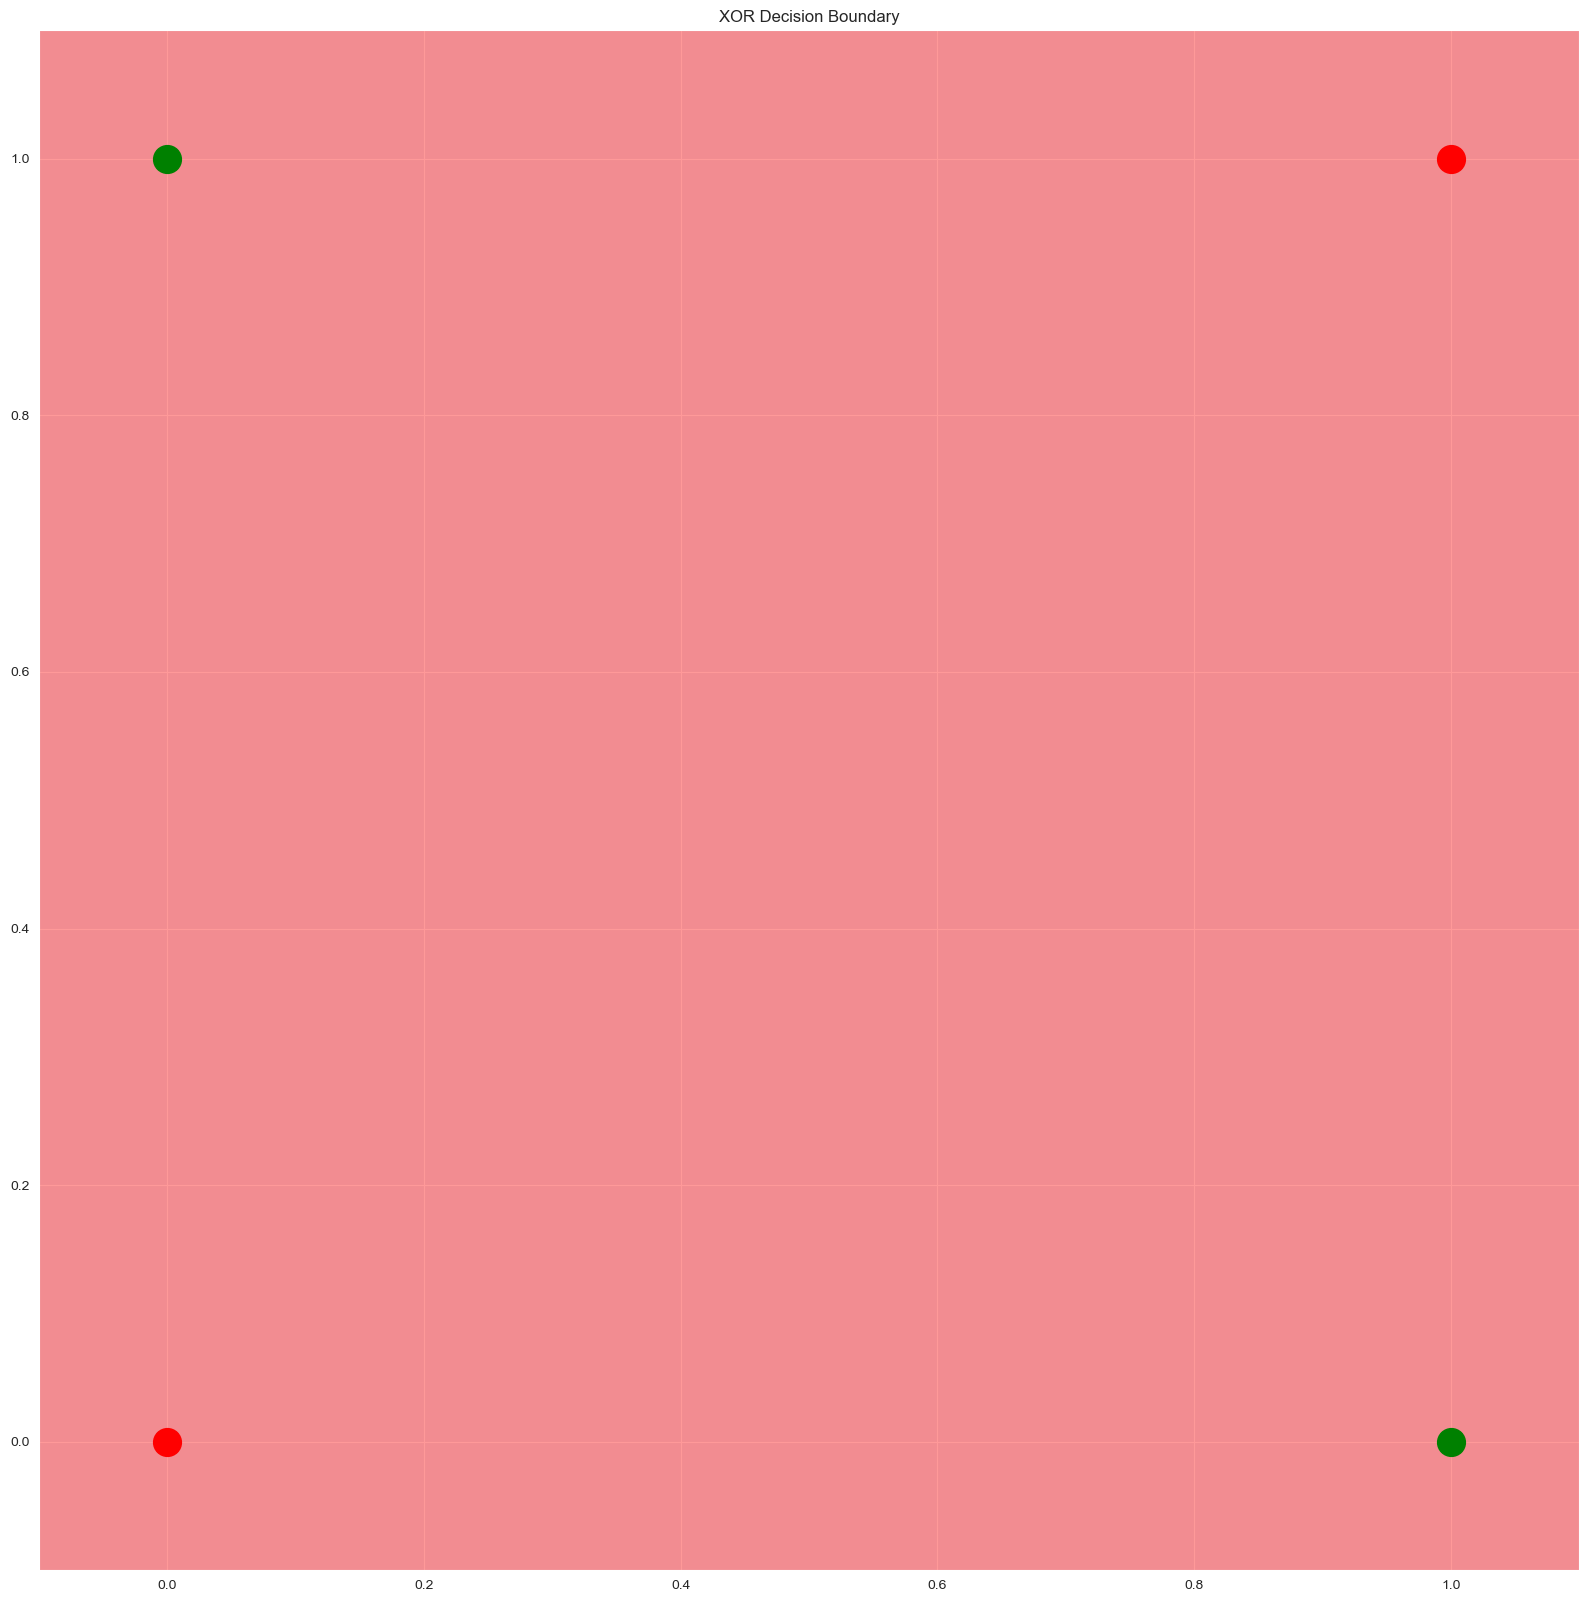

In [8]:
# plot the decision boundary for each perceptron
xor.plot()
plt.title("XOR Decision Boundary")
plt.show()